In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob

from ifsoac_2 import *

In [2]:


def mci(prefix, dir_path = r"../data/", save_prefix=None, **op):
    n = 512*60*5  # 5 minutes only

    fn = glob(dir_path + prefix)
    if isinstance(fn, list) and len(fn)>1:
        fn.sort()
    for i,f in enumerate(fn):
        print(i+1,f)
    _op= {"cmap_ds":"CET_C1", "ventana_ds":1200, "cols_ds":4}
    if op is not None:
        _op.update(op)
    op=_op
    if save_prefix is not None:
        return Ifsoac([pd.read_csv(name, header=None).to_numpy()[5000:200000] for name in fn], op).export_images(filename_prefix=save_prefix)
    else:
        return Ifsoac([pd.read_csv(name, header=None).to_numpy()[5000:200000] for name in fn], op).plot()

1 ../data/VIGREP/MGNA5VREP_P3.txt
CPU times: user 1.01 s, sys: 72.5 ms, total: 1.08 s
Wall time: 1.11 s


""

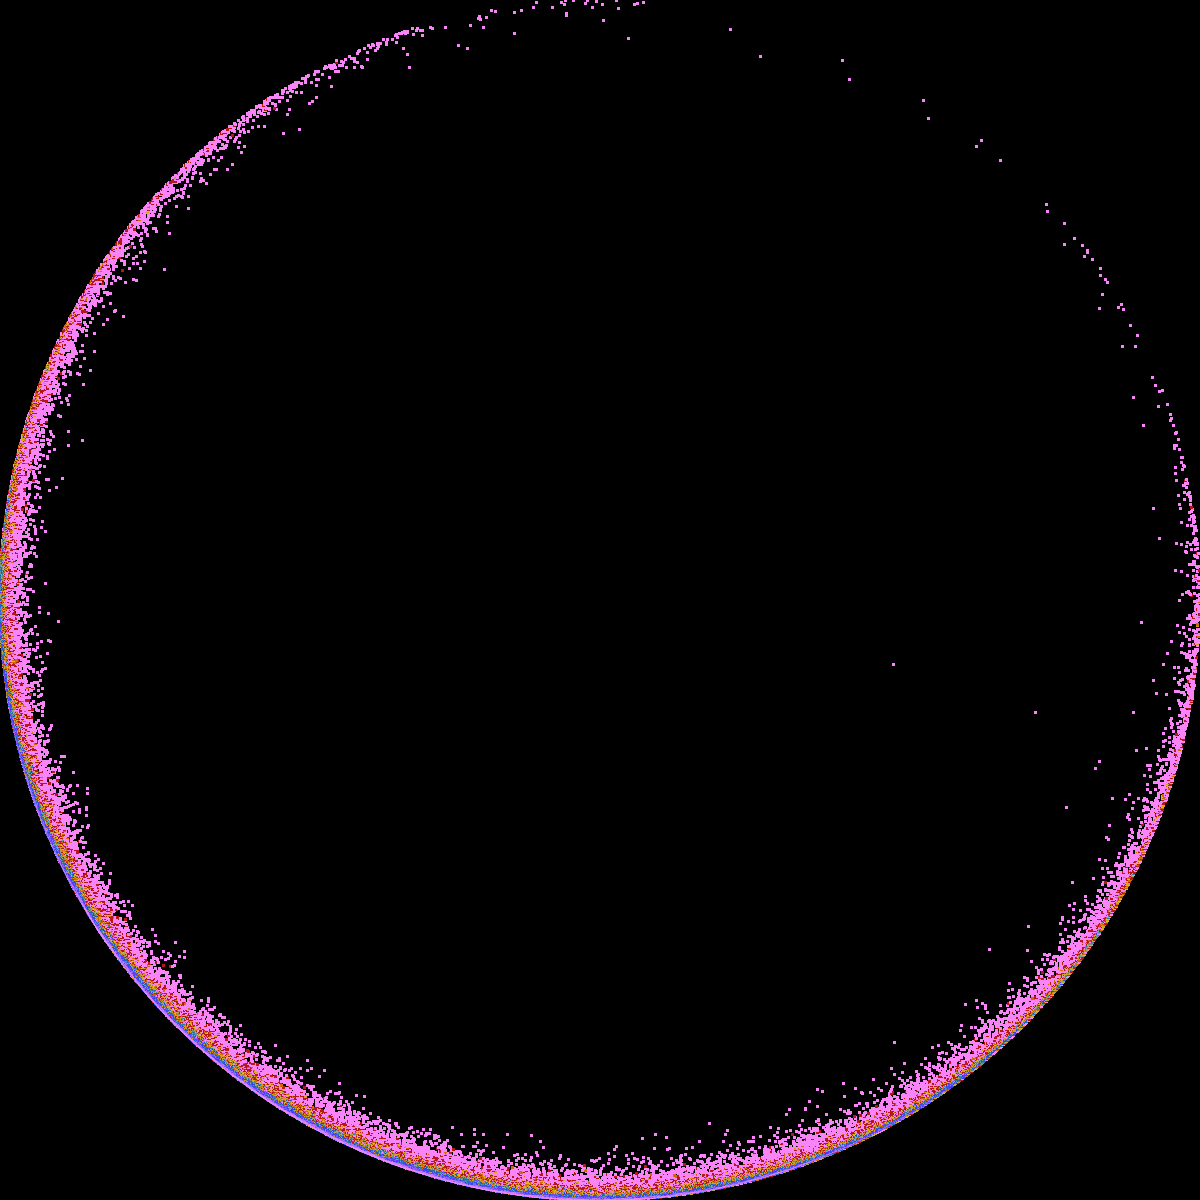

In [3]:
#%time mci(r"MG*F4*", "MG")
%time mci(r"VIGREP/MG*", rotate=np.pi/4, fatpoints=True)

1 ../data/VIGREP/MGNA5VREP_P3.txt
CPU times: user 95 ms, sys: 27.4 ms, total: 122 ms
Wall time: 135 ms


""

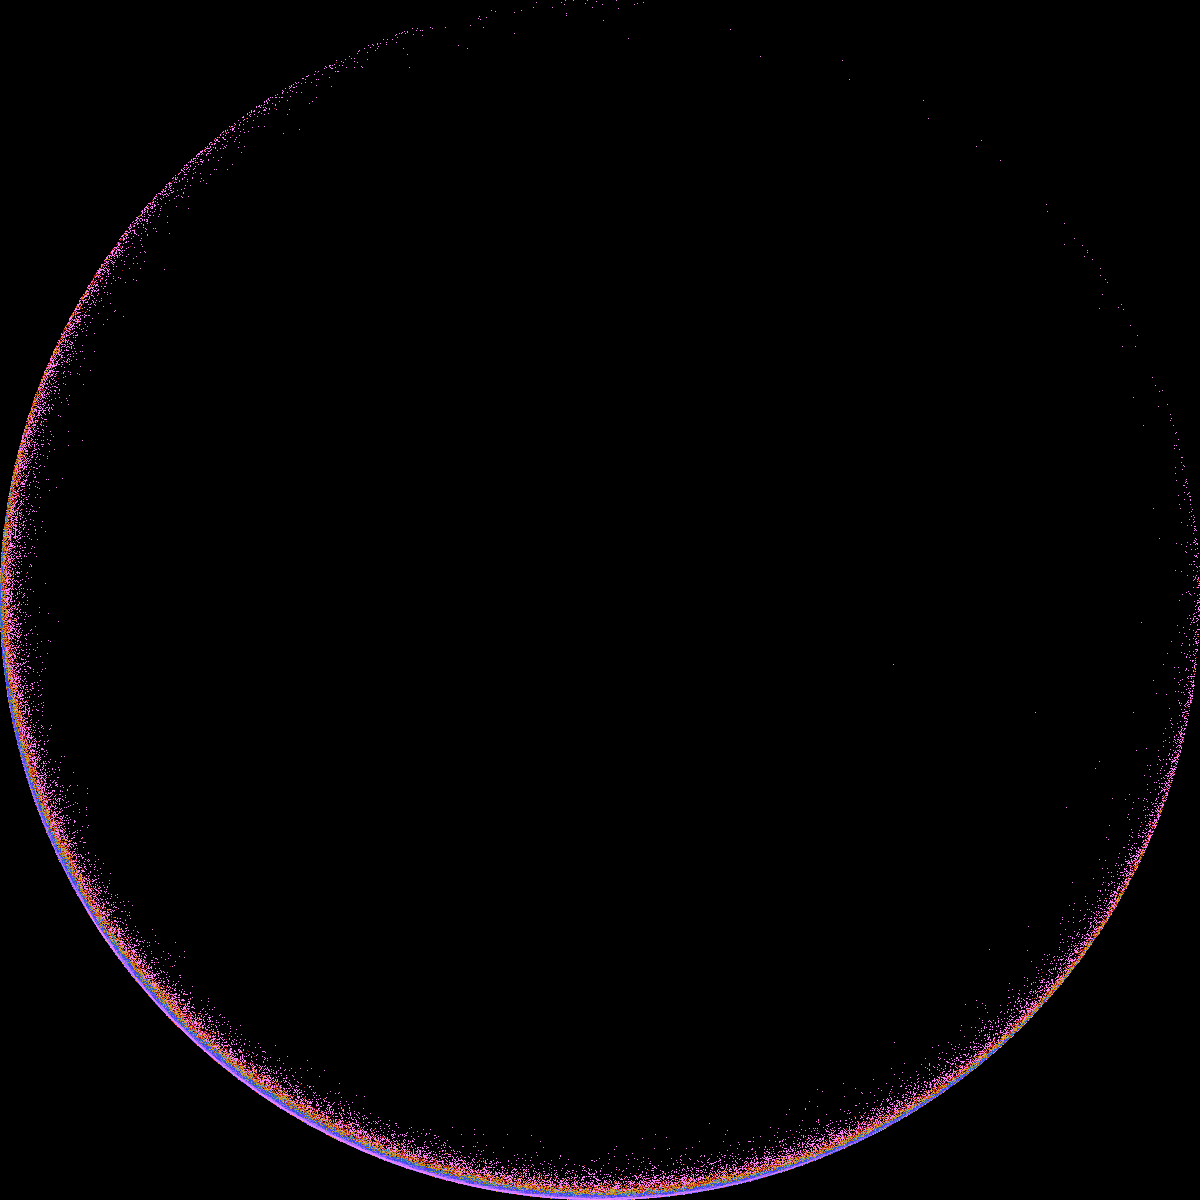

In [4]:
%time mci(r"VIGREP/MG*", rotate=np.pi/4,  ventana_ds=1200)

1 ../data/VIGREP/RLMNVIGREP_P3.txt
CPU times: user 131 ms, sys: 39 ms, total: 170 ms
Wall time: 180 ms


""

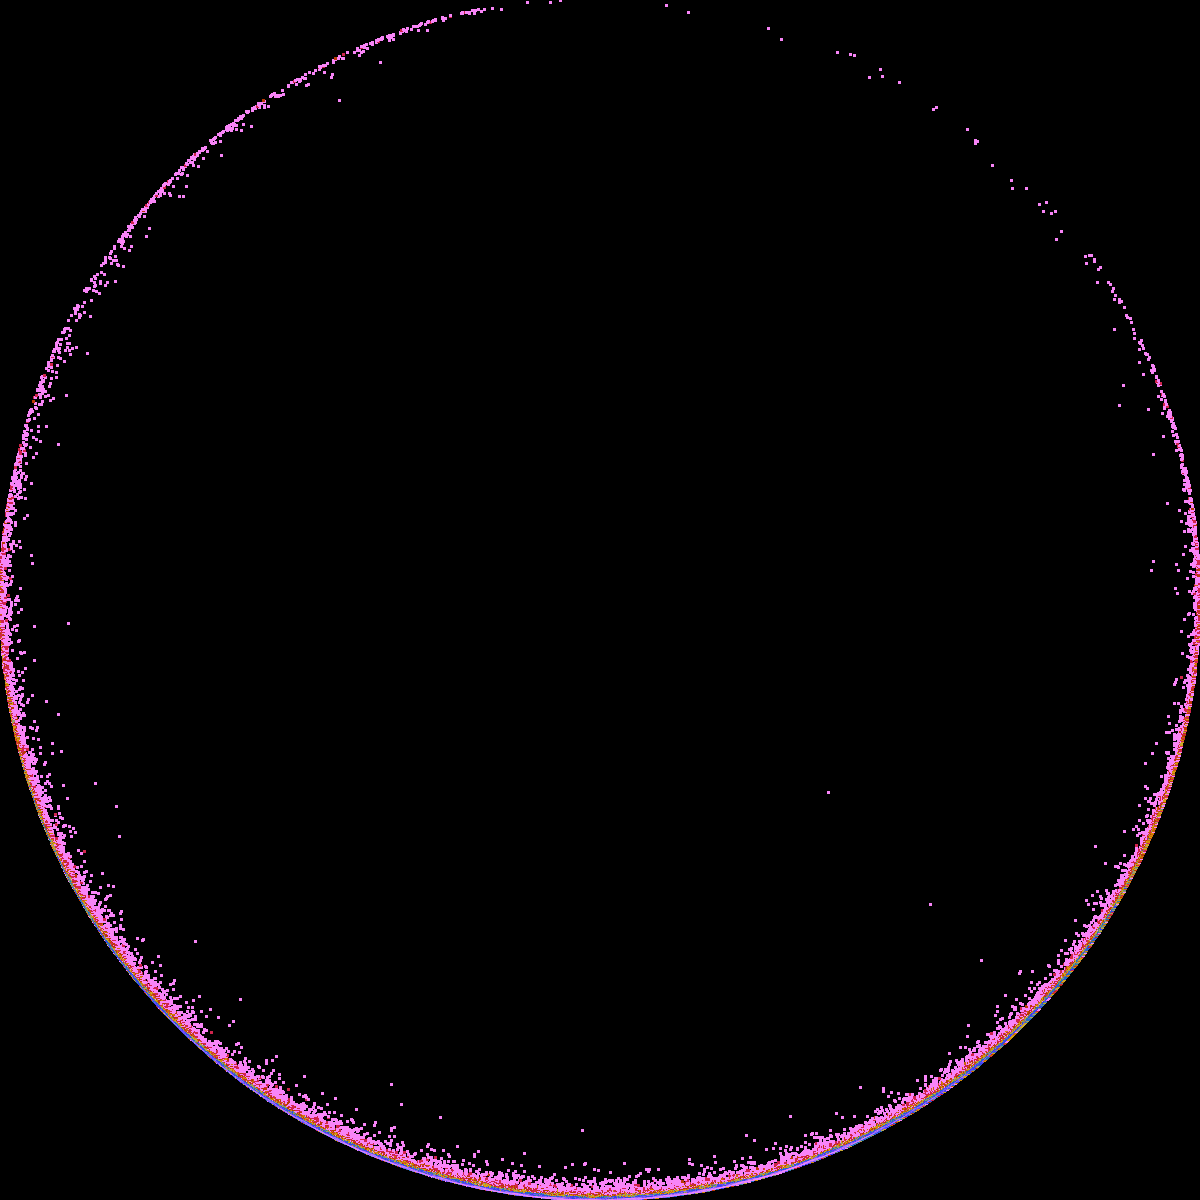

In [5]:
#%time mci(r"RL*F4*", "RL")
%time mci(r"VIGREP/RL*", fatpoints=True)#, "RL")

In [6]:
def dimension_fractal(orb):
    """(orb.real, orb.imag)"""
    # pares = orb.view('(2,)float')  # ver complejos como par de reales
    # pares = np.array((orb.real, orb.imag)).T
    # scales = np.logspace(6, 15, num=16, endpoint=True, base=2)
    scales = np.logspace(0.01, 10, num=16, endpoint=False, base=2)
    ns = []
    for escala in scales:
        h, _, _ = np.histogram2d(orb[0], orb[1], bins=(int(escala), int(escala)))
        n = np.sum(h > 0)
        ns.append(n)
        if n >= orb.shape[1]:
            break
    coeffs = np.polyfit(np.log2(scales[:len(ns)]), np.log2(ns), 1)
    return coeffs[0]

In [8]:
n = 512*60*5
data = pd.read_csv("../data/VIGREP/MGNA5VREP_P3.txt", header=None).to_numpy()[5000:158600]
op = {"rotate":0, "cmap_ds":"CET_C1", "ventana_ds":1200, "cols_ds":4}

img_points = np.array(Ifsoac(data, op).jDC()).T
print(dimension_fractal(img_points))

data = pd.read_csv("../data/VIGREP/RLMNVIGREP_P3.txt", header=None).to_numpy()[5000:158600]
img_points = np.array(Ifsoac(data, op).jDC()).T
print(dimension_fractal(img_points))

1.4916769313685836
1.4613806260914484


1 ../data/VIGREP/MGNA5VREP_P3.txt
CPU times: user 86 ms, sys: 32.2 ms, total: 118 ms
Wall time: 123 ms


""

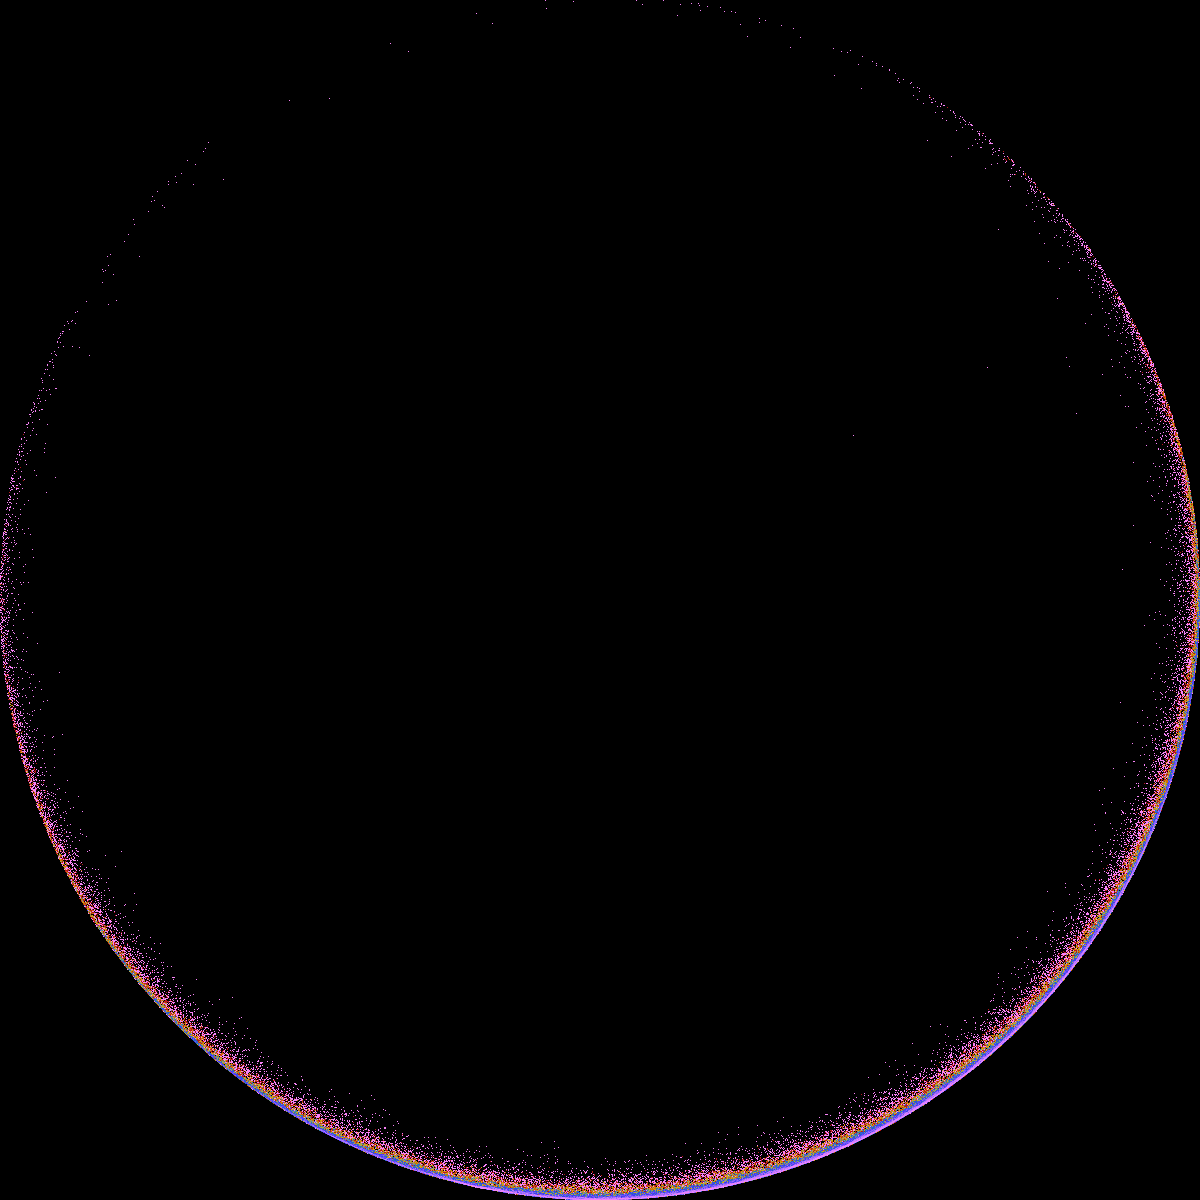

In [9]:
%time mci(r"VIGREP/MG*", fatpoints=False)

1 ../data/VIGREP/RLMNVIGREP_P3.txt
CPU times: user 128 ms, sys: 53.6 ms, total: 181 ms
Wall time: 223 ms


""

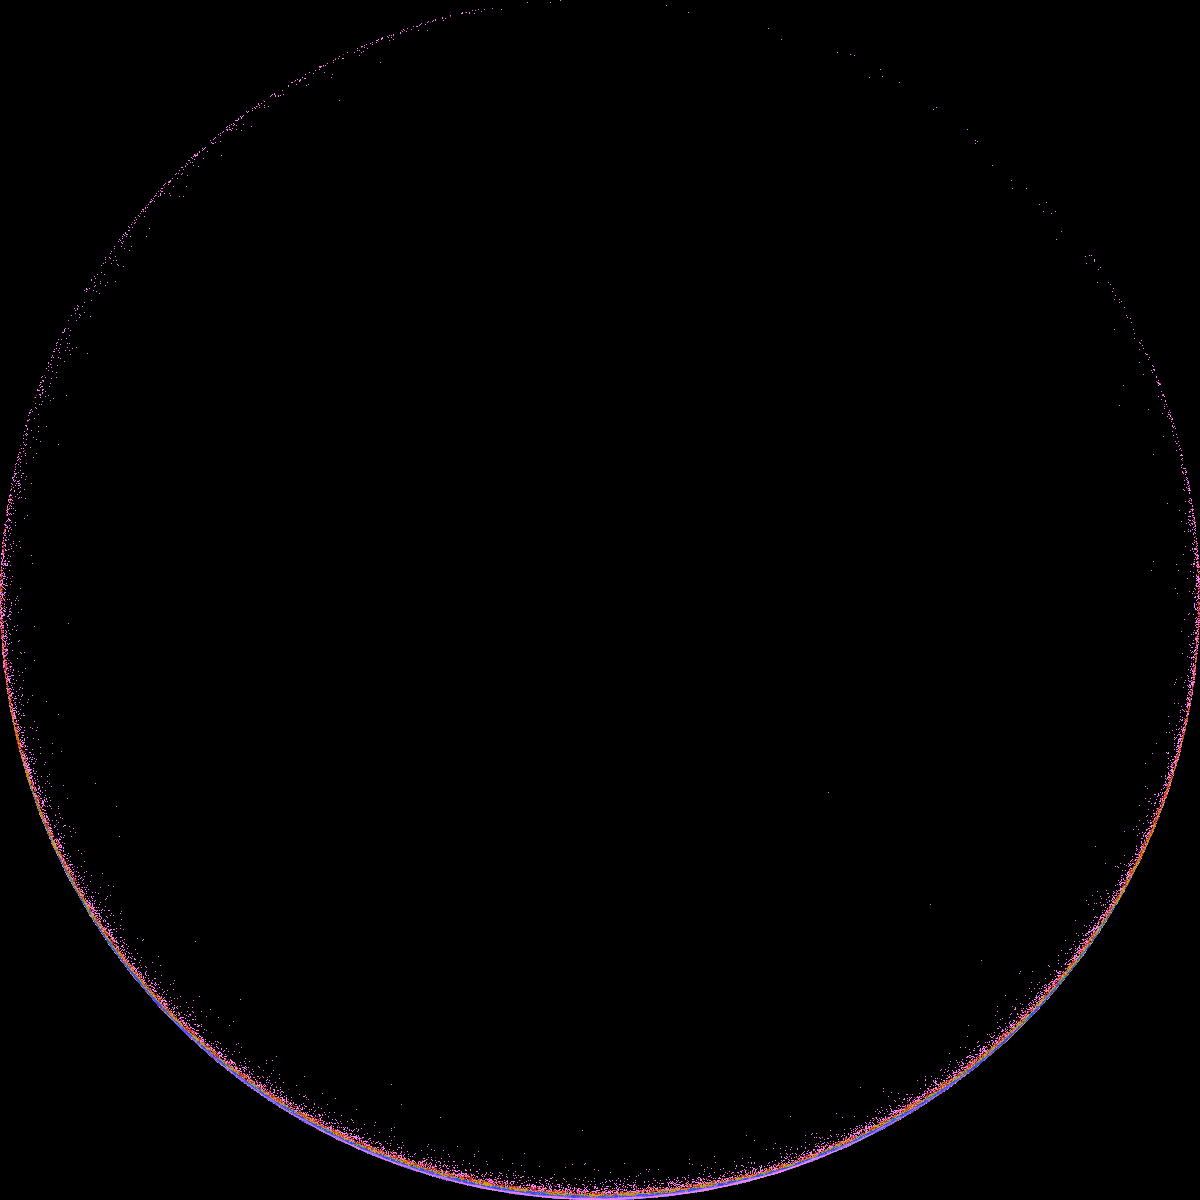

In [10]:
%time mci(r"VIGREP/RL*", fatpoints=False)

1 ../data/VIGREP/MGNA5VREP_P3.txt
CPU times: user 187 ms, sys: 26.7 ms, total: 214 ms
Wall time: 216 ms


""

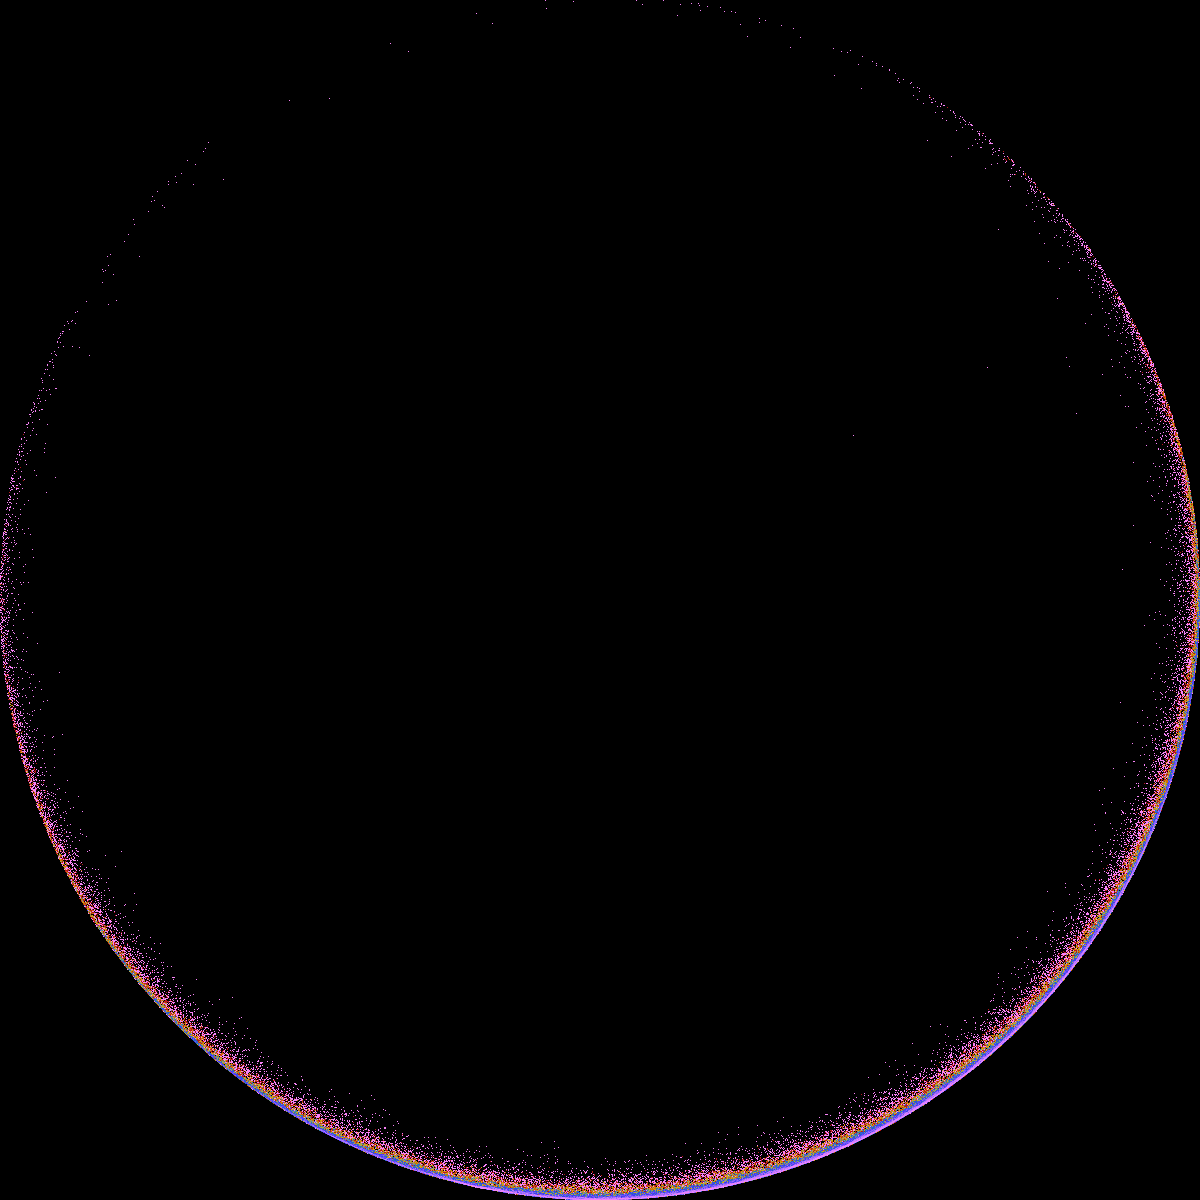

In [11]:
%time mci(r"VIGREP/MG*P3*", fatpoints=False, save_prefix="MG")

1 ../data/VIGREP/RLMNVIGREP_P3.txt
CPU times: user 189 ms, sys: 40.6 ms, total: 229 ms
Wall time: 234 ms


""

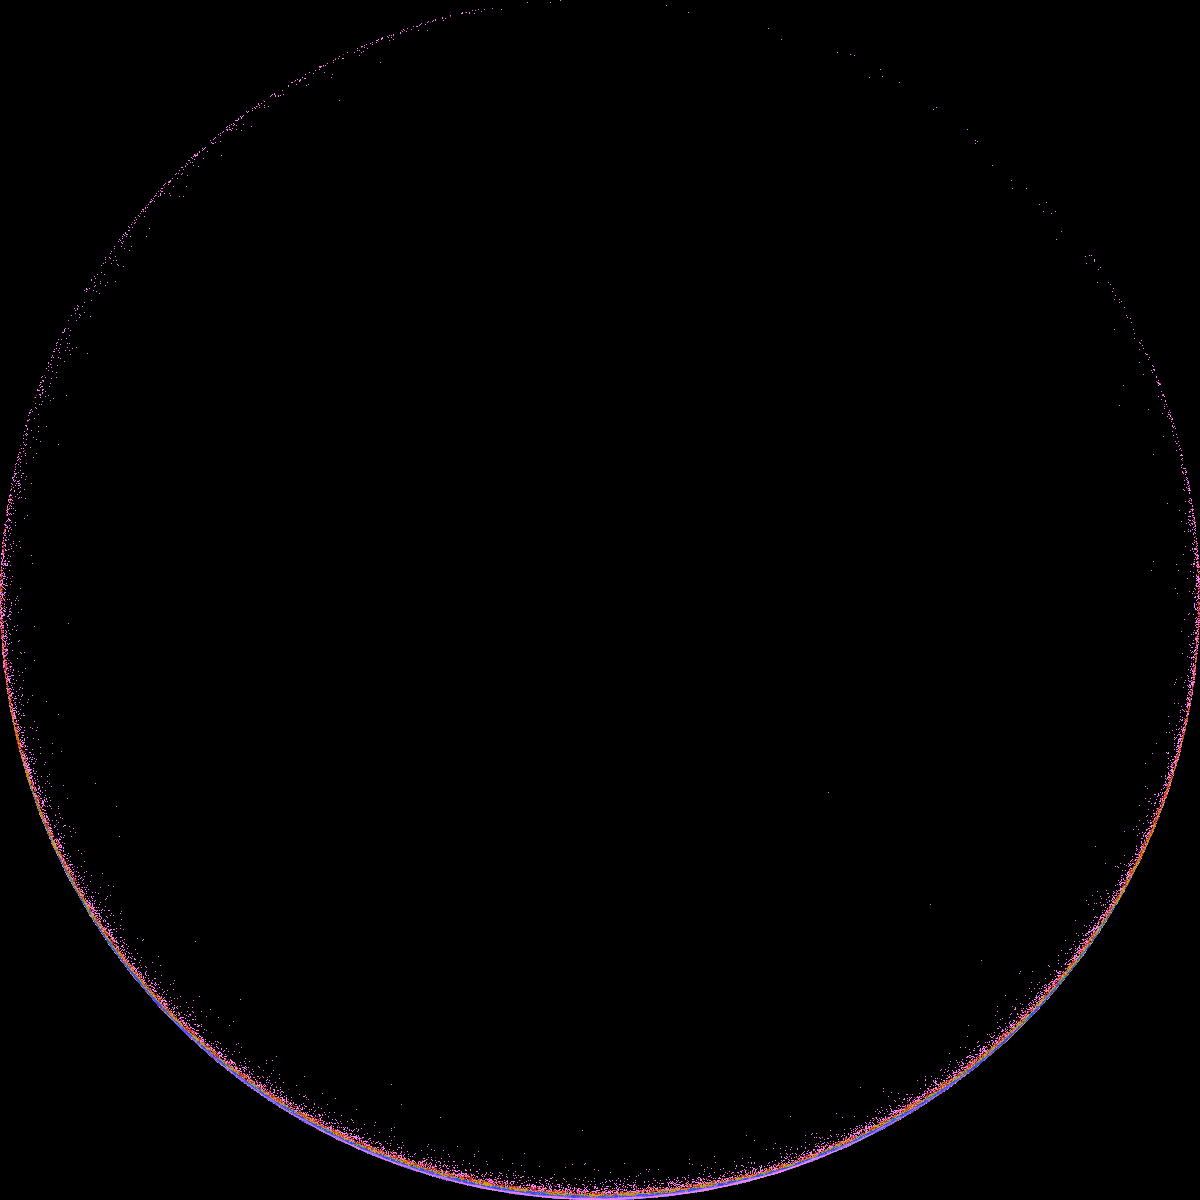

In [12]:
%time mci(r"VIGREP/RL*P3*", fatpoints=False, save_prefix="RL")

<AxesSubplot:>

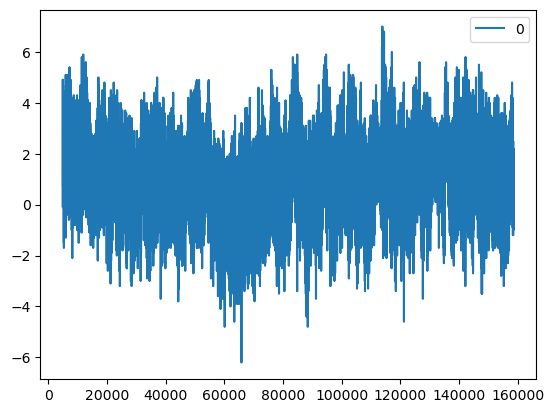

In [13]:
pd.read_csv("../data/VIGREP/MGNA5VREP_P3.txt", header=None)[5000:158600].plot()

<AxesSubplot:>

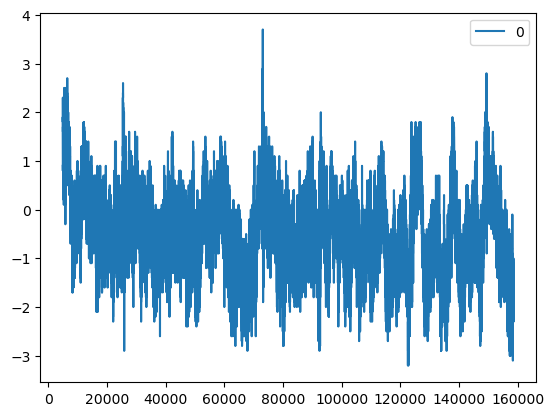

In [14]:
pd.read_csv("../data/VIGREP/RLMNVIGREP_P3.txt", header=None)[5000:158600].plot()